In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [96]:
df = pd.read_csv('../Datasets/ML/house_pricing_data.csv')

In [97]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df.drop(['date', 'month', 'yr_built'], axis = 1, inplace = True)

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'street', 'city', 'statezip', 'country', 'year',
       'month_sin', 'month_cos'],
      dtype='object')

In [98]:
# df.drop(df[df['price'] <= 0].index, inplace = True)
# df['price_log'] = np.log1p(df['price'])

# df.shape

In [99]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,street,city,statezip,country,year,month_sin,month_cos
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,0.5,-0.866025
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,0,709 W Blaine St,Seattle,WA 98119,USA,2014,0.5,-0.866025
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,0.5,-0.866025
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,0.5,-0.866025
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,0.5,-0.866025


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  street         4600 non-null   object 
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
 15  country        4600 non-null   object 
 16  year           4600 non-null   int32  
 17  month_sin      4600 non-null   float64
 18  month_co

<Axes: xlabel='sqft_living', ylabel='Count'>

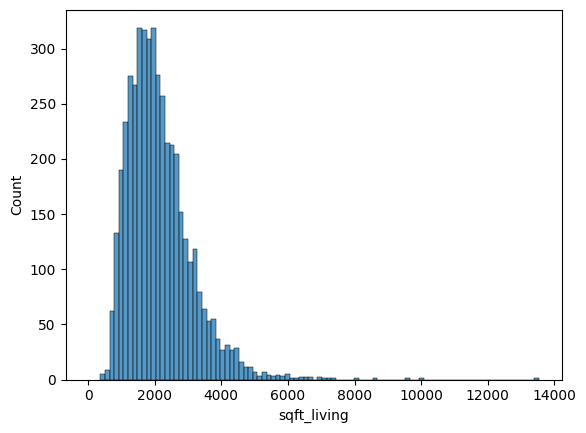

In [101]:
sns.histplot(df, x = 'sqft_living')
df['sqft_living'] = np.log1p(df['sqft_living'])
sns.histplot(df, x = 'sqft_living')

<Axes: xlabel='sqft_lot', ylabel='Count'>

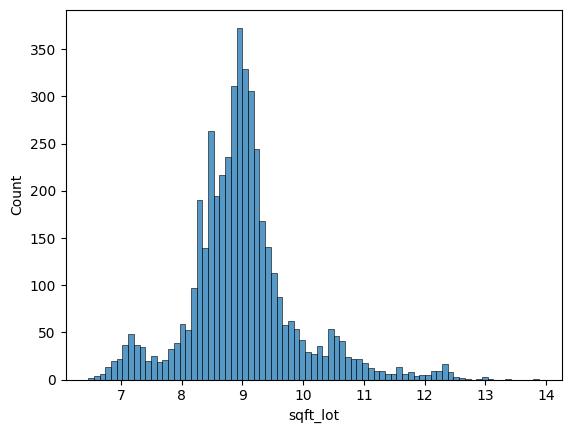

In [102]:
# sns.histplot(df, x = 'sqft_lot')
df['sqft_lot'] = np.log1p(df['sqft_lot'])
sns.histplot(df, x = 'sqft_lot')

<Axes: xlabel='sqft_above', ylabel='Count'>

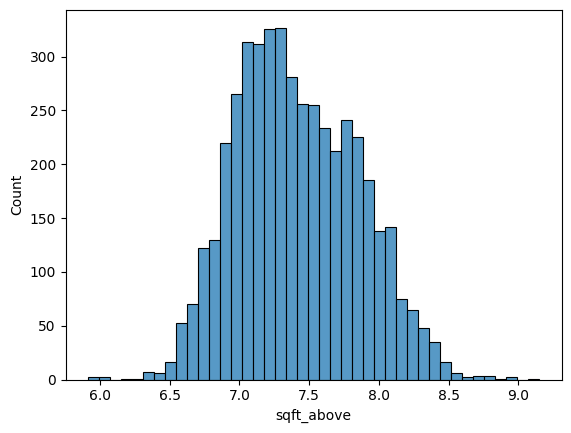

In [103]:
# sns.histplot(df, x = 'sqft_above')
df['sqft_above'] = np.log1p(df['sqft_above'])
sns.histplot(df, x = 'sqft_above')

<Axes: xlabel='sqft_basement', ylabel='Count'>

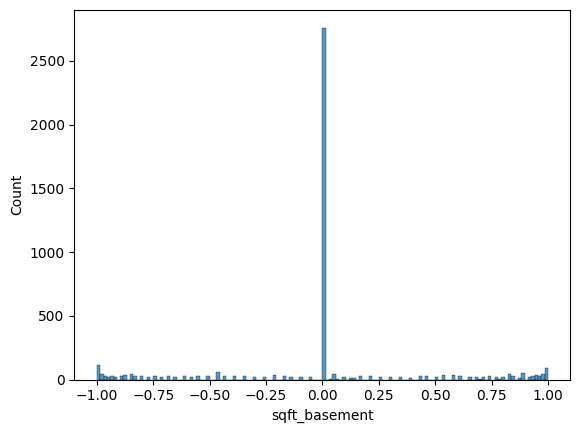

In [104]:
# sns.histplot(df, x = 'sqft_basement')
df['sqft_basement'] = np.sin(df['sqft_basement'])
sns.histplot(df, x = 'sqft_basement')

In [105]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [106]:
from scipy.stats import zscore

df['lot_z'] = zscore(df['sqft_lot'])
# df.drop(df[zscore(df['sqft_lot']) < -3].index)
df.drop(df[df['lot_z'] > 3].index, inplace = True)
df.drop('lot_z', axis = 1, inplace = True)

In [107]:
X = df.drop('price', axis = 1)
y = df['price']

cat_cols = df.select_dtypes(include = 'object').columns

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)

r2_score(y_test, lr.predict(X_test))

0.06217172062149634

In [109]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
X_poly = PolynomialFeatures(degree = 2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size = 0.8, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)

r2_score(y_test, lr.predict(X_test))

0.07176720240648682